### 7. custom FFNN
#### 1) 활성화함수가 있는 FFNN
활성화 함수가 있는 FFNN를 구현해 보자.
$$\begin{aligned}
s &= x \cdot w + b \\
\hat y &= f(s) \\
e &= (\hat y - y)^2 \\ 
& \\
\cfrac {\partial e}{\partial w} &= \cfrac{\partial e}{\partial \hat y} \cfrac{\partial \hat y}{\partial s} \cfrac{\partial s}{\partial w} \\
&= x^T \cdot 2(\hat y - y)f^{'}(s)\\
(p, h=1) &= (b, p)^T \cdot [(B, 1) \times (B, 1)]
\end{aligned}$$

참고로:
$$\begin{aligned}
f(x) &= \tanh(x) \\
f^{'}(x) &= 1 - \tanh^2(x)
\end{aligned}$$

이를 위해 propagate_forward(self, x)함수를 구해보자.

In [3]:
%matplotlib inline
import numpy as np

x_train = np.random.rand(1024, 1)
y_train = x_train * 0.1 - 0.05

x_val = np.random.rand(32).reshape(-1,1)
y_val = x_val * 0.1 - 0.05

x_test = np.arange(0, 10, 2).reshape(-1,1)*.1
y_test = x_test * 0.1 - 0.05

In [35]:
class FFNN:
    def __init__(self, lr=0.01):
        self.lr = lr
        # initial weights: w는 .5, b는 .0
        self.w = np.array([0.5]).reshape(-1, 1)
        self.b = np.array([0.])
        
    def calc_sum(self, x, w, b):
        return np.dot(x, w) + b
    
    # feed forward network
    def predict(self, x):
        return np.tanh(self.calc_sum(x, self.w, self.b))
    
    # train for one batch. x 자체가 batch
    def train_on_batch(self, x, y, istrain=True):
        N = x.shape[0]
        s = self.calc_sum(x, self.w, self.b)
        Y = self.predict(x)
        loss = 1/2 * np.sum(Y - y)**2
        if istrain:
            #dw = 1 / N * x.T.dot((self.predict(x) - y) * (1 - self.predict(x)**2))
            dw = 1 / N * x.T.dot((Y - y) * (1 - np.tanh(s)**2))
            db = 1 / N * np.sum((Y - y) * (1 - np.tanh(s)**2))
            self.w -= self.lr * dw
            self.b -= self.lr * db
        return loss
    
    def fit(self, x, y, batch_size=16, epochs=100, val_data=None):
        Losses = {}
        Losses["train_loss"] = []
        if val_data is not None:
            Losses["val_loss"] = []
        
        for i in range(epochs):
            Loss = 0
            
            N = x.shape[0]
            
            for j in range(0, N, batch_size):
                x_batch = x[j:j + batch_size]
                y_batch = y[j:j + batch_size]
                n = x_batch.shape[0]
                Loss += (self.train_on_batch(x_batch, y_batch, istrain=False) / n)
            print("Train Loss at Epoch %d is %.8f" %(i, Loss))
            Losses["train_loss"].append(Loss)
            if val_data is not None:
                val_N = val_data[0].shape[0]
                val_loss = self.train_on_batch(*val_data) / val_N
                print("Val Loss at Epoch %d is %.8f" %(i, val_loss))
                Losses["val_loss"].append(val_loss)
                
        return Losses

In [36]:
model = FFNN()

In [37]:
hist = model.fit(x_train, y_train, val_data=(x_val, y_val))

Train Loss at Epoch 0 is 30.32059871
Val Loss at Epoch 0 is 0.77887092
Train Loss at Epoch 1 is 29.74068278
Val Loss at Epoch 1 is 0.76269730
Train Loss at Epoch 2 is 29.17046580
Val Loss at Epoch 2 is 0.74680983
Train Loss at Epoch 3 is 28.60983914
Val Loss at Epoch 3 is 0.73120506
Train Loss at Epoch 4 is 28.05869344
Val Loss at Epoch 4 is 0.71587949
Train Loss at Epoch 5 is 27.51691875
Val Loss at Epoch 5 is 0.70082965
Train Loss at Epoch 6 is 26.98440457
Val Loss at Epoch 6 is 0.68605203
Train Loss at Epoch 7 is 26.46103993
Val Loss at Epoch 7 is 0.67154312
Train Loss at Epoch 8 is 25.94671351
Val Loss at Epoch 8 is 0.65729942
Train Loss at Epoch 9 is 25.44131366
Val Loss at Epoch 9 is 0.64331740
Train Loss at Epoch 10 is 24.94472849
Val Loss at Epoch 10 is 0.62959357
Train Loss at Epoch 11 is 24.45684594
Val Loss at Epoch 11 is 0.61612440
Train Loss at Epoch 12 is 23.97755387
Val Loss at Epoch 12 is 0.60290640
Train Loss at Epoch 13 is 23.50674007
Val Loss at Epoch 13 is 0.5899360

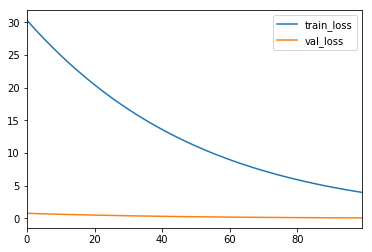

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# loss의 결과를 시각화하세요.
pd.DataFrame(hist).plot()

In [39]:
pd.DataFrame(hist)

,train_loss,val_loss
0,30.320599,0.778871
1,29.740683,0.762697
2,29.170466,0.746810
3,28.609839,0.731205
4,28.058693,0.715879
5,27.516919,0.700830
6,26.984405,0.686052
7,26.461040,0.671543
8,25.946714,0.657299
9,25.441314,0.643317


In [40]:
pd.DataFrame({'pred':model.predict(x_test).ravel(), 'target':y_test.ravel()})

,pred,target
0,-0.121774,-0.05
1,-0.039651,-0.03
2,0.043011,-0.01
3,0.125088,0.01
4,0.205489,0.03
